In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

In [2]:
# --- 1. Load the Datasets ---
try:
    df1 = pd.read_csv('../data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
    df2 = pd.read_csv('../data/IHMStefanini_industrial_safety_and_health_database.csv')
except FileNotFoundError:
    print("Error: Make sure the CSV files are in a 'data' subfolder in your project's root directory.")
    # Handle error or exit if files are not found
    exit()

In [3]:
# --- 2. Explore the Datasets Individually ---
print("--- First DataFrame (Accident Info) ---")
print(df1.head())
print("\n")
print(df1.info())
print("\n\n")

print("--- Second DataFrame (Severity Info) ---")
print(df2.head())
print("\n")
print(df2.info())

--- First DataFrame (Accident Info) ---
   Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                              

In [4]:
# --- 3. Merge the Datasets ---
# The two files don't have a common named column to join on, but they appear to be aligned by row.
# merge them based on their index.
# drop the 'Unnamed: 0' columns as they are just row counters.
if "Unnamed: 0" in df1.columns:
    df1 = df1.drop("Unnamed: 0", axis=1)
if "Unnamed: 0" in df2.columns:
    df2 = df2.drop("Unnamed: 0", axis=1)

# Concatenate the dataframes horizontally
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)

In [5]:
# --- 4. Initial Exploration of Merged Data ---
print("\n\n--- Merged DataFrame ---")
print(df.head())
print("\n")
print("Merged DataFrame Info:")
df.info()



--- Merged DataFrame ---
                  Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

           

In [6]:
# --- 1. Correcting the Data Merge ---
import pandas as pd

# Load the datasets again
try:
    df_desc = pd.read_csv('../data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')
    df_labels = pd.read_csv('../data/IHMStefanini_industrial_safety_and_health_database.csv')
except FileNotFoundError:
    print("Error: Make sure the CSV files are in a 'data' subfolder in your project's root directory.")
    exit()

# From your output, it seems the label column in the second file is 'Risco Critico'.
# Let's create a new, clean DataFrame with just the columns we need.
# We'll take 'Description' from the first file and 'Risco Critico' from the second.
df = pd.DataFrame({
    'Description': df_desc['Description'],
    'Critical Risk': df_labels['Risco Critico']  # Using the column from the second file
})




In [7]:
# --- 2. Data Cleaning ---
print("--- Cleaned and Combined DataFrame ---")
print("Shape before cleaning:", df.shape)

# It's crucial to drop rows where either the description or the label is missing.
# This also handles the discrepancy in the number of rows between the original files.
df.dropna(subset=['Description', 'Critical Risk'], inplace=True)



--- Cleaned and Combined DataFrame ---
Shape before cleaning: (439, 2)


In [8]:
# Let's also remove any rows that might have very short, unhelpful descriptions
df = df[df['Description'].str.len() > 20]

print("\nShape after cleaning:", df.shape)
print("\nCleaned DataFrame Head:")
print(df.head())



Shape after cleaning: (425, 2)

Cleaned DataFrame Head:
                                         Description        Critical Risk
0  While removing the drill rod of the Jumbo 08 f...              Pressed
1  During the activation of a sodium sulphide pum...  Pressurized Systems
2  In the sub-station MILPO located at level +170...         Manual Tools
3  Being 9:45 am. approximately in the Nv. 1880 C...               Others
4  Approximately at 11:45 a.m. in circumstances t...               Others


In [9]:

# Check for missing values to confirm our cleaning worked
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Description      0
Critical Risk    0
dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# --- 3. Analyze the Cleaned Target Variable ---
print("\n\n--- Analysis of Cleaned 'Critical Risk' Column ---")



--- Analysis of Cleaned 'Critical Risk' Column ---


Value Counts for 'Critical Risk':
Critical Risk
Others                                       224
Pressed                                       23
Manual Tools                                  20
Chemical substances                           17
Pressurized Systems / Chemical Substances     15
Venomous Animals                              14
Projection                                    13
Cut                                           12
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
remains of choco                               7
Fall prevention (same level)                   6
Fall prevention                                6
Suspended Loads                                6
Liquid Metal                                   3
Blocking and isolation of energies             3
Power lock                                     3
Not applicable       

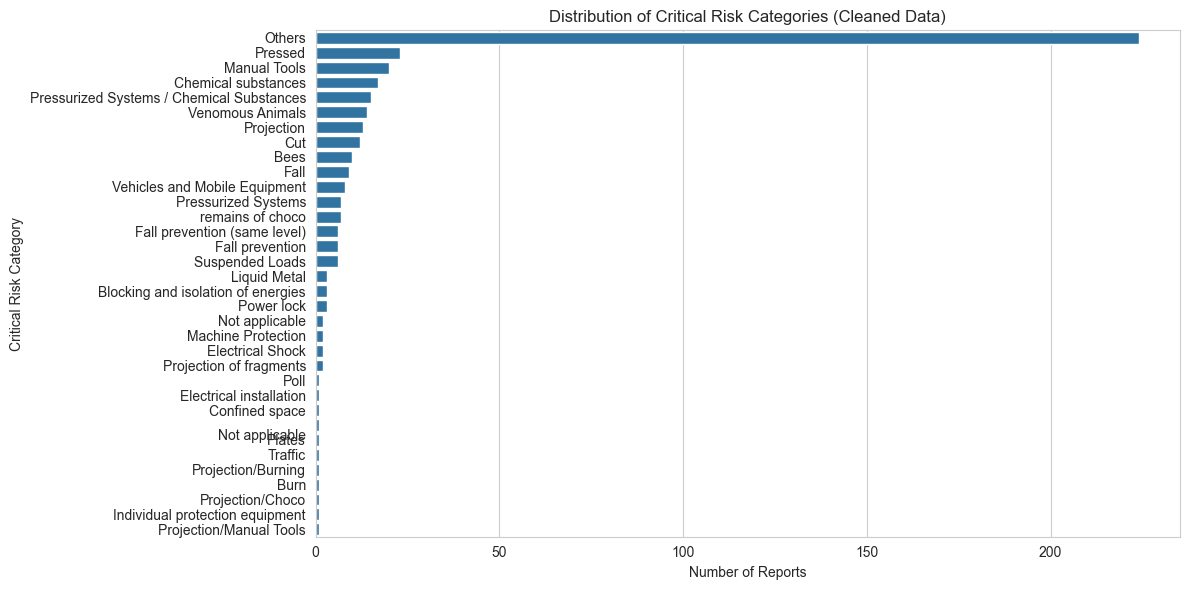

In [11]:
# Check the unique categories and their counts
print("Value Counts for 'Critical Risk':")
print(df['Critical Risk'].value_counts())

# Visualize the distribution of the 'Critical Risk' categories
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Critical Risk'], order = df['Critical Risk'].value_counts().index)
plt.title('Distribution of Critical Risk Categories (Cleaned Data)')
plt.xlabel('Number of Reports')
plt.ylabel('Critical Risk Category')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# --- 4. Label Encoding ---

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder on 'Critical Risk' column and transform it into numbers
df['labels'] = le.fit_transform(df['Critical Risk'])

# It's very important to save the mapping from numbers back to the original labels
# We'll need this later to understand the model's predictions.
id2label = {i: label for i, label in enumerate(le.classes_)}
label2id = {label: i for i, label in enumerate(le.classes_)}

print("--- Label Encoding Complete ---")
print("Mapping of Label ID to Label Name:")
print(id2label)
print("\nDataFrame with new 'labels' column:")
print(df.head())

--- Label Encoding Complete ---
Mapping of Label ID to Label Name:
{0: '\nNot applicable', 1: 'Bees', 2: 'Blocking and isolation of energies', 3: 'Burn', 4: 'Chemical substances', 5: 'Confined space', 6: 'Cut', 7: 'Electrical Shock', 8: 'Electrical installation', 9: 'Fall', 10: 'Fall prevention', 11: 'Fall prevention (same level)', 12: 'Individual protection equipment', 13: 'Liquid Metal', 14: 'Machine Protection', 15: 'Manual Tools', 16: 'Not applicable', 17: 'Others', 18: 'Plates', 19: 'Poll', 20: 'Power lock', 21: 'Pressed', 22: 'Pressurized Systems', 23: 'Pressurized Systems / Chemical Substances', 24: 'Projection', 25: 'Projection of fragments', 26: 'Projection/Burning', 27: 'Projection/Choco', 28: 'Projection/Manual Tools', 29: 'Suspended Loads', 30: 'Traffic', 31: 'Vehicles and Mobile Equipment', 32: 'Venomous Animals', 33: 'remains of choco'}

DataFrame with new 'labels' column:
                                         Description        Critical Risk  \
0  While removing the d

In [13]:
from sklearn.model_selection import train_test_split

# --- 5. Find and Filter Rare Classes to Fix Stratification ---

# First, let's confirm which classes are causing the problem by looking at the counts
print("--- Value Counts of Each Class ---")
print(df['Critical Risk'].value_counts().sort_values())
print("\n")

# A model can't learn from a single example, so we'll remove classes with fewer than 2 members.
# Get the value counts
value_counts = df['Critical Risk'].value_counts()

# Identify the class names (the index) we want to keep
to_keep = value_counts[value_counts > 1].index

# Filter the DataFrame to only include the classes we want to keep
df_filtered = df[df['Critical Risk'].isin(to_keep)].copy() # Use .copy() to avoid SettingWithCopyWarning

# re-create the 'labels' column on the newly filtered data
# to ensure everything is aligned.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered['labels'] = le.fit_transform(df_filtered['Critical Risk'])

# update our label mappings
id2label = {i: label for i, label in enumerate(le.classes_)}
label2id = {label: i for i, label in enumerate(le.classes_)}


print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape after removing single-member classes: {df_filtered.shape}\n")

--- Value Counts of Each Class ---
Critical Risk
Electrical installation                        1
Confined space                                 1
\nNot applicable                               1
Plates                                         1
Traffic                                        1
Projection/Burning                             1
Burn                                           1
Projection/Choco                               1
Poll                                           1
Individual protection equipment                1
Projection/Manual Tools                        1
Machine Protection                             2
Projection of fragments                        2
Not applicable                                 2
Electrical Shock                               2
Liquid Metal                                   3
Blocking and isolation of energies             3
Power lock                                     3
Fall prevention (same level)                   6
Fall prevention     

In [14]:
# --- 6. Train-Validation Split (on Filtered Data) ---
# Now we use our clean, filtered DataFrame
X = df_filtered['Description']
y = df_filtered['labels']

# This will now work correctly because every class has at least 2 members
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Data Splitting Complete ---")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Number of unique labels:", len(id2label))

--- Data Splitting Complete ---
Training set shape: (331,)
Validation set shape: (83,)
Number of unique labels: 23


In [15]:
from transformers import AutoTokenizer

# ---  Tokenization ---

# Load the tokenizer for DistilBERT
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Tokenize the training and validation text
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True)

# Let's inspect the output for one example
print("--- Tokenization Complete ---")
print("\nOriginal Text:")
print(X_train.iloc[0])
print("\nTokenized Input IDs:")
print(train_encodings['input_ids'][0])

C:\Users\user\anaconda3\envs\safety_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Tokenization Complete ---

Original Text:
When cutting the vegetation to open the bite, using a sickle, the assistant struck the vine twice. When the liana ruptured, the top of the branch projected against the face of the auxiliary causing the cut in the upper lip.

Tokenized Input IDs:
[101, 2043, 6276, 1996, 10072, 2000, 2330, 1996, 6805, 1010, 2478, 1037, 5305, 2571, 1010, 1996, 3353, 4930, 1996, 15351, 3807, 1012, 2043, 1996, 22393, 2532, 21766, 13876, 12165, 1010, 1996, 2327, 1997, 1996, 3589, 11310, 2114, 1996, 2227, 1997, 1996, 9830, 4786, 1996, 3013, 1999, 1996, 3356, 5423, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
import torch

# --- 7. Create PyTorch Dataset ---
class SafetyReportDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # The .items() method converts the dictionary of encodings (input_ids, attention_mask)
        # into a list of key-value pairs.
        # The dictionary comprehension then creates a new dictionary where each value
        # is converted to a PyTorch tensor.
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset objects for our training and validation sets
# convert y_train and y_val to lists for the dataset class
train_dataset = SafetyReportDataset(train_encodings, y_train.tolist())
val_dataset = SafetyReportDataset(val_encodings, y_val.tolist())

print("--- PyTorch Datasets Created ---")

--- PyTorch Datasets Created ---


In [17]:
from transformers import AutoModelForSequenceClassification

# --- 8. Load the Pre-trained Model ---

num_labels = len(id2label)

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
)

print(f"--- Model Loaded: {model_checkpoint} ---")
print(f"Number of labels: {num_labels}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- Model Loaded: distilbert-base-uncased ---
Number of labels: 23


In [18]:
from transformers import TrainingArguments, Trainer
import numpy as np
import evaluate

# --- 9. Define Training Arguments and Metrics ---

# --- A. Define the metric ---
# We will use accuracy for this task.
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    """This function computes accuracy during model evaluation."""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


# --- B. Define Training Arguments ---
training_args = TrainingArguments(
    output_dir="./results",          # Directory where the model and checkpoints will be saved
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=50,                 # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir="./logs",            # Directory for storing logs
    logging_steps=10,                # Log every 10 steps
    evaluation_strategy="epoch",     # Run evaluation at the end of each epoch
    save_strategy="epoch",           # Save a checkpoint at the end of each epoch
    load_best_model_at_end=True,     # Load the best model (based on loss) at the end of training
)

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
# --- 10. Instantiate and Run the Trainer ---

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Start the training
trainer.train()